# 台中市人口管理統計平台爬取

https://demographics.taichung.gov.tw/Demographic/index.html?s=13959658

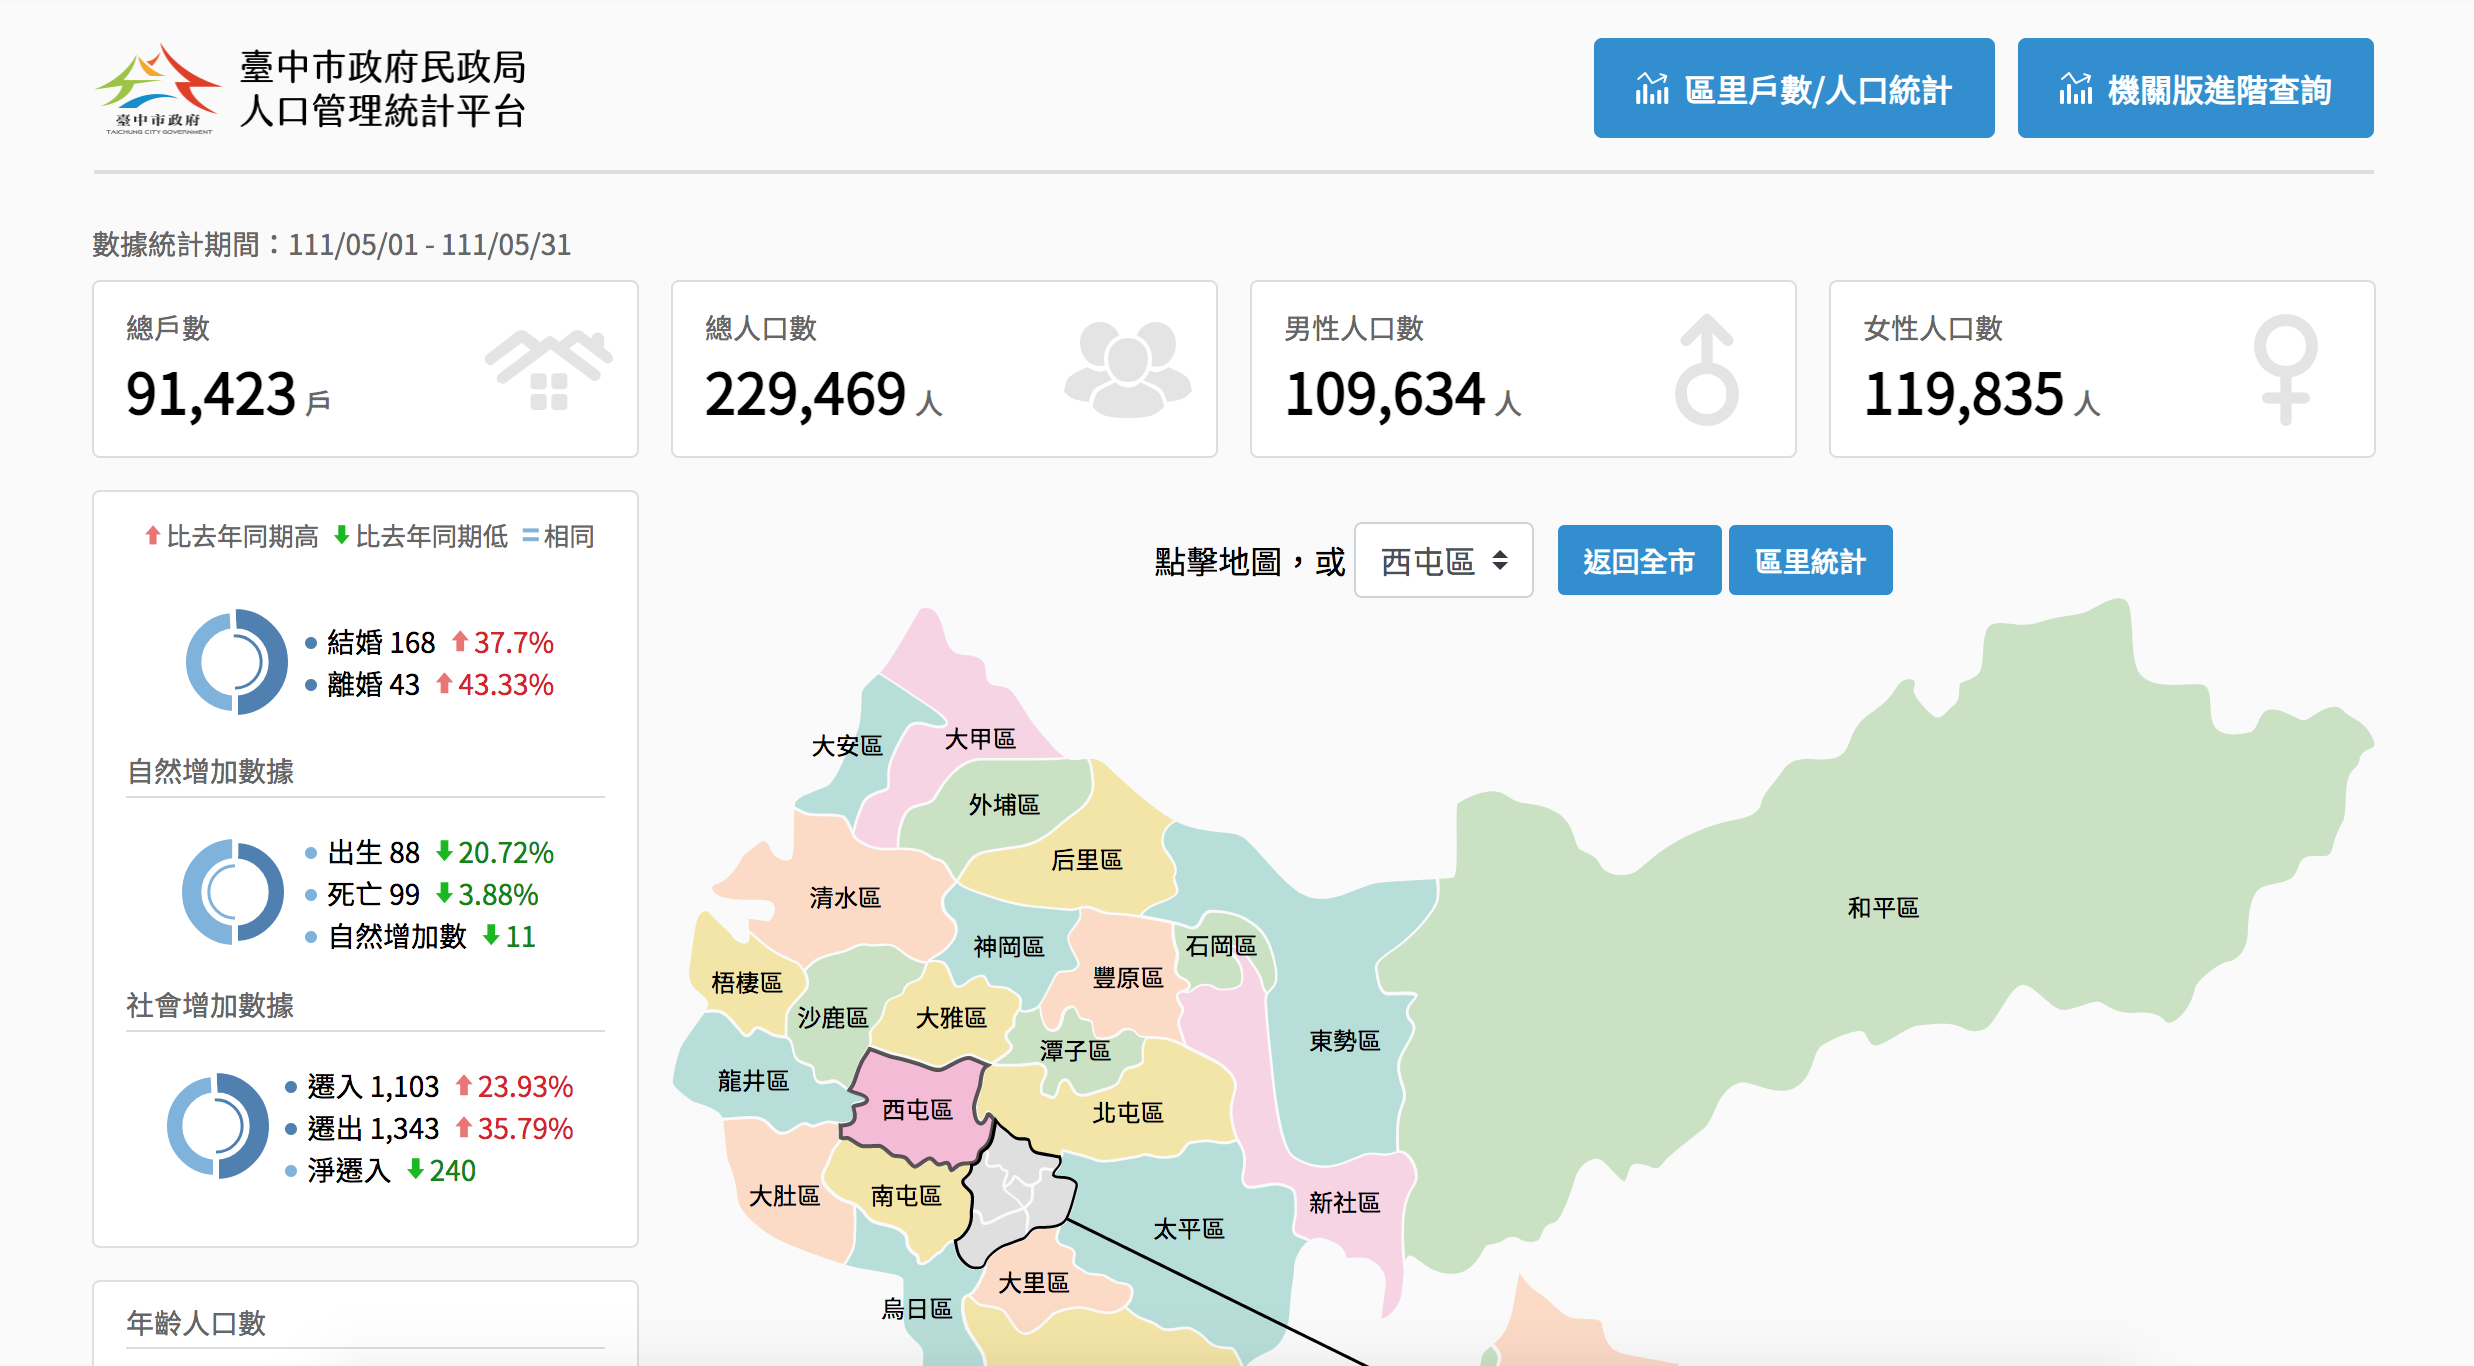

### 本次運用技能
1. selenium爬蟲，創造互動式選單。
2. 串接AWS使用MySQL語法(存入RDS)。
3. 使用SQL創造之表格做出視覺化圖表。


In [2]:
# 可以去掉 python 輸出時，因為軟體版本所引起的警告的警告。
import warnings
warnings.filterwarnings('ignore')

## 1.爬取初始資料

In [3]:
!pip install selenium

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import Select
import time
from selenium.webdriver.common.keys import Keys

url = "https://demographics.taichung.gov.tw/Demographic/index.html?s=13959658"

driver = webdriver.Chrome("chromedriver.exe")
driver.get(url)   # 連接目的地網頁伺服器

time.sleep(3)

### 台中市人口概況

In [5]:
items = driver.find_elements_by_class_name("text-shout-data.ng-binding")

for ele in items:
    
    print(ele.text)

1,022,349戶
2,799,339人
1,372,483人
1,426,856人


### 總戶數：

In [6]:
total_house_number = items[0].text.strip()

print("台中市總戶數：", total_house_number)

台中市總戶數： 1,022,349戶


### 總人口數：

In [7]:
total_population =  items[1].text.strip()

print("台中市總人口數：", total_population)

台中市總人口數： 2,799,339人


### 男女總人口數：

In [8]:
total_male_population =  items[2].text.strip()

print('台中市男性人口總數：', total_male_population)

台中市男性人口總數： 1,372,483人


In [9]:
total_female_population =  items[3].text.strip()

print('台中市女性人口總數:', total_female_population)

台中市女性人口總數: 1,426,856人


## 選區

In [10]:
import ipywidgets as widgets
from IPython.display import display

In [11]:
# maximize window
driver.maximize_window()

### 此網頁有做響應式設計，請維持網頁全開，否則xpath會變動

In [12]:
# 抓取下拉選單元件
box = driver.find_element_by_xpath('/html/body/div/div[3]/div/div[7]/div/div/select')
#box = driver.find_elements_by_class_name("custom-select mr-2 ng-pristine ng-valid ng-empty ng-touched")

print(box.is_displayed())#確認選單可顯示

driver.execute_script("$(arguments[0]).click()",box) #點擊後才能互動
print(box.is_displayed()) #確認元件可互動

True
True


In [13]:
select_box = driver.find_element_by_xpath("/html/body/div/div[3]/div/div[7]/div/div/select")
# if your select_box has a name.. why use xpath?..... 
# this step could use either xpath or name, but name is sooo much easier.

options = [x for x in select_box.find_elements_by_tag_name("option")]
# this part is cool, because it searches the elements contained inside of select_box 
# and then adds them to the list options if they have the tag name "options"

dist1_values = {}
for element in options:
    dist1_values[element.text]= element.get_attribute("value")
    #把抓到的文字，.TEXT解析出文字，成為字典的KEY值，且幫她配對Value。
dist1_values
# or append to list or whatever you want here

{'全市': '',
 '中區': '06',
 '東區': '11',
 '南區': '14',
 '西區': '0E',
 '北區': '09',
 '西屯區': '0D',
 '南屯區': '13',
 '北屯區': '08',
 '豐原區': '1C',
 '東勢區': '12',
 '大甲區': '01',
 '清水區': '18',
 '沙鹿區': '0F',
 '梧棲區': '17',
 '后里區': '0C',
 '神岡區': '16',
 '潭子區': '1A',
 '大雅區': '05',
 '新社區': '19',
 '石岡區': '0B',
 '外埔區': '0A',
 '大安區': '02',
 '烏日區': '15',
 '大肚區': '03',
 '龍井區': '1B',
 '霧峰區': '1D',
 '太平區': '07',
 '大里區': '04',
 '和平區': '10'}

### 方法1:選取下拉選單

In [14]:
dist_sel = widgets.Select(
    options = dist1_values,
    description='行政區',
    disabled=False)

display(dist_sel)

Select(description='行政區', options={'全市': '', '中區': '06', '東區': '11', '南區': '14', '西區': '0E', '北區': '09', '西屯區'…

In [15]:
#讀取行政區value
dist = str(dist_sel.value)
print(dist)

select = Select(box)
select.select_by_value(dist) #選區

動態網頁點取 https://blog.csdn.net/u012874140/article/details/108869803

### 行政區資料:

In [16]:
data = driver.find_elements_by_class_name("text-shout-data.ng-binding")

# 輸出當前選擇的區域之戶數、人口數....
# 如果用這個，下一欄的now要加上.text
# now = Select(box).first_selected_option

now = dist_sel.label
print(now)

for ele in data: 
    print(ele.text)

全市
1,022,349戶
2,799,339人
1,372,483人
1,426,856人


In [17]:
dist_house_number = data[0].text.strip()
dist_population = data[1].text.strip()
dist_male = data[2].text.strip()
dist_female = data[3].text.strip()

print('台中市'+now+'戶數:'+dist_house_number)
print('台中市'+now+'總人口數:'+dist_population)
print('台中市'+now+'男性人口總數:'+dist_male)
print('台中市'+now+'女性人口總數:'+dist_female)

台中市全市戶數:1,022,349戶
台中市全市總人口數:2,799,339人
台中市全市男性人口總數:1,372,483人
台中市全市女性人口總數:1,426,856人


### 方法2:點選地圖

In [18]:
#找到地圖元件
map = driver.find_element_by_xpath('//*[@id="taichung-map"]')

#讀取行政區與其代碼
path = [x for x in map.find_elements_by_tag_name("path")]
text = [y for y in map.find_elements_by_class_name("map-text")]

dist2 = []
map_id = []
dist2_values = {}

for t in text:
    dist2.append(t.text)
    
for element in path:
    map_id.append(element.get_attribute("id"))
    
for i in range(len(dist2)):
    dist2_values[dist2[i]] = map_id[i]
    
print(dist2_values)

{'和平區': 'dist_10', '東勢區': 'dist_12', '新社區': 'Xinshe', '石岡區': 'Shigang', '霧峰區': 'Wufeng', '太平區': 'Taiping', '大里區': 'Dali', '烏日區': 'Wuri', '北屯區': 'Beitun', '潭子區': 'Tanzi', '豐原區': 'Fengyuan', '南屯區': 'Nantun', '西屯區': 'Xitun', '大雅區': 'Daya', '神岡區': 'Shengang', '后里區': 'Houli', '大肚區': 'Dadu', '龍井區': 'Longjing', '沙鹿區': 'Shalu', '梧棲區': 'Wuqi', '清水區': 'Qingshui', '外埔區': 'Waipu', '大甲區': 'Dajia', '大安區': 'Daan', '南區': 'South', '東區': 'East', '中區': 'Central', '西區': 'West', '北區': 'North'}


In [19]:
dist_sel2 = widgets.Select(
    options=dist2_values,
    description='行政區',
    disabled=False)

display(dist_sel2)

Select(description='行政區', options={'和平區': 'dist_10', '東勢區': 'dist_12', '新社區': 'Xinshe', '石岡區': 'Shigang', '霧峰區…

In [20]:
dist = dist_sel2.value
print(dist)

#用id找到選取的行政區並點選
map_click = driver.find_element_by_id(dist)
driver.execute_script("$(arguments[0]).click()",map_click) 

dist_10


### 行政區資料:

In [21]:
data = driver.find_elements_by_class_name("text-shout-data.ng-binding")

now = dist_sel2.label
print(now)

for ele in data: 
    print(ele.text)

和平區
1,022,349戶
2,799,339人
1,372,483人
1,426,856人


In [22]:
dist_house_number = data[0].text.strip()
dist_population = data[1].text.strip()
dist_male = data[2].text.strip()
dist_female = data[3].text.strip()

print('台中市'+now+'戶數:'+dist_house_number)
print('台中市'+now+'總人口數:'+dist_population)
print('台中市'+now+'男性人口總數:'+dist_male)
print('台中市'+now+'女性人口總數:'+dist_female)

台中市和平區戶數:1,022,349戶
台中市和平區總人口數:10,936人
台中市和平區男性人口總數:5,833人
台中市和平區女性人口總數:5,103人


## 3.儲存數據

In [23]:
#要存進資料的5個欄位
dist_list = dist2
house_number = []
population = []
male_number = []
female_number = []

for i in map_id:
    
    #有空值
    try:
        map_click = driver.find_element_by_id(i)
        driver.execute_script("$(arguments[0]).click()",map_click) 
        time.sleep(1) #等待網頁反應
        data = driver.find_elements_by_class_name("text-shout-data.ng-binding") 
        house_number.append(int(data[0].text.strip().replace('戶','').replace(',','')))
        population.append(int(data[1].text.strip().replace('人','').replace(',','')))
        male_number.append(int(data[2].text.strip().replace('人','').replace(',','')))
        female_number.append(int(data[3].text.strip().replace('人','').replace(',','')))
    except:
        break
        
print(dist_list)
print(house_number)
print(population)
print(male_number)
print(female_number)

['和平區', '東勢區', '新社區', '石岡區', '霧峰區', '太平區', '大里區', '烏日區', '北屯區', '潭子區', '豐原區', '南屯區', '西屯區', '大雅區', '神岡區', '后里區', '大肚區', '龍井區', '沙鹿區', '梧棲區', '清水區', '外埔區', '大甲區', '大安區', '南區', '東區', '中區', '西區', '北區']
[4693, 17465, 7805, 4935, 21132, 69637, 73808, 27799, 112447, 38164, 55447, 68438, 91589, 31021, 20348, 17032, 18716, 24778, 32372, 19695, 30596, 10006, 24166, 5632, 50591, 29365, 7894, 46192, 60586]
[10936, 47880, 23403, 14262, 64148, 195198, 211148, 77371, 290785, 108592, 163182, 175848, 229623, 95089, 64434, 53664, 56096, 77564, 96297, 59484, 88457, 31323, 74891, 18260, 124874, 75150, 17459, 111725, 142196]
[5833, 24466, 12073, 7349, 32411, 96253, 103134, 38616, 138462, 53428, 80236, 83780, 109680, 47214, 32821, 27074, 28542, 38906, 48382, 29802, 45091, 15959, 37504, 9636, 59643, 37103, 8627, 52816, 67642]
[5103, 23414, 11330, 6913, 31737, 98945, 108014, 38755, 152323, 55164, 82946, 92068, 119943, 47875, 31613, 26590, 27554, 38658, 47915, 29682, 43366, 15364, 37387, 8624, 65231, 38047, 8

## 4. 存入資料庫

In [24]:
!pip install pymysql

### 資料庫連接設定

In [25]:
import pymysql
#import charts
# 資料庫設定
db_settings = {
    "host": "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx",
    "port": 3306,
    "user": "xxxxxx",
    "password": "xxxxxxx",
    
}
try:
    # 建立Connection物件
    conn = pymysql.connect(**db_settings)
    print('ok')
except Exception as ex:
    print(ex)

ok


### 查看資料庫

In [30]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
#SQL語法
sql="SHOW DATABASES"
cursor.execute(sql)
db.commit()
for i in cursor:
    print(i)
#關閉連線
db.close()

('covid1',)
('information_schema',)
('mydatabase',)
('mysql',)
('performance_schema',)
('sys',)


### 創建資料庫

In [31]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
#SQL語法
sql="CREATE DATABASE Taichung"
cursor.execute(sql)
db.commit()
#for i in cursor:
#  print(i)
#關閉連線
db.close()

### 創建資料表

In [38]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
sql="USE Taichung"
cursor.execute(sql)

# Drop table if it already exist using execute() method.
cursor.execute("DROP TABLE IF EXISTS Taichung")

#SQL語法
sql="CREATE TABLE Taichung(District VARCHAR(255),House INT,Population INT,MalePopulation INT,FemalePopulation INT)"
try:
    cursor.execute(sql)
  #提交修改
    db.commit()
    print('success')
except:
  #發生錯誤時停止執行SQL
    db.rollback()
    print('error')

#關閉連線
db.close()

success


### 查看資料表

In [40]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
sql="USE Taichung"
cursor.execute(sql)
#SQL語法
sql="show tables"
cursor.execute(sql)
db.commit()
for i in cursor:
    print(i)
#關閉連線
db.close()

('Taichung',)


### 將爬取資料存入資料表

In [41]:
db = pymysql.connect(**db_settings)
# #建立操作游標
cursor = db.cursor()
sql="USE Taichung"
cursor.execute(sql)
#SQL語法
for d in range(len(dist_list)):
    sql = "INSERT INTO Taichung (District,House,Population,MalePopulation,FemalePopulation) \
    VALUES ('%s','%d','%d','%d','%d') " %\
    (dist_list[d],house_number[d],population[d],male_number[d],female_number[d])
    
    #執行語法
    try:
        cursor.execute(sql)
    #提交修改
        db.commit()
        print('success')
    except:
    #發生錯誤時停止執行SQL
        db.rollback()
        print('error')

#關閉連線
db.close()

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


In [43]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
sql="USE Taichung"
cursor.execute(sql)
#SQL語法
sql="select * from Taichung"
cursor.execute(sql)
db.commit()
result = cursor.fetchall()
print(result)
#關閉連線
db.close()

(('和平區', 4693, 10936, 5833, 5103), ('東勢區', 17465, 47880, 24466, 23414), ('新社區', 7805, 23403, 12073, 11330), ('石岡區', 4935, 14262, 7349, 6913), ('霧峰區', 21132, 64148, 32411, 31737), ('太平區', 69637, 195198, 96253, 98945), ('大里區', 73808, 211148, 103134, 108014), ('烏日區', 27799, 77371, 38616, 38755), ('北屯區', 112447, 290785, 138462, 152323), ('潭子區', 38164, 108592, 53428, 55164), ('豐原區', 55447, 163182, 80236, 82946), ('南屯區', 68438, 175848, 83780, 92068), ('西屯區', 91589, 229623, 109680, 119943), ('大雅區', 31021, 95089, 47214, 47875), ('神岡區', 20348, 64434, 32821, 31613), ('后里區', 17032, 53664, 27074, 26590), ('大肚區', 18716, 56096, 28542, 27554), ('龍井區', 24778, 77564, 38906, 38658), ('沙鹿區', 32372, 96297, 48382, 47915), ('梧棲區', 19695, 59484, 29802, 29682), ('清水區', 30596, 88457, 45091, 43366), ('外埔區', 10006, 31323, 15959, 15364), ('大甲區', 24166, 74891, 37504, 37387), ('大安區', 5632, 18260, 9636, 8624), ('南區', 50591, 124874, 59643, 65231), ('東區', 29365, 75150, 37103, 38047), ('中區', 7894, 17459, 8627, 8832), (

## 5.視覺化圖表

In [26]:
#將SQL中的檔案匯出再載入python中

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#載入資料
data=pd.read_csv('TAICHUNG.csv')

In [31]:
#確認資料是否正常
print(data.head())

  District  House  Population  MalePopulation  FemalePopulation
0      和平區   4693       10936            5833              5103
1      東勢區  17465       47880           24466             23414
2      新社區   7805       23403           12073             11330
3      石岡區   4935       14262            7349              6913
4      霧峰區  21132       64148           32411             31737


Text(0, 0.5, '人口')

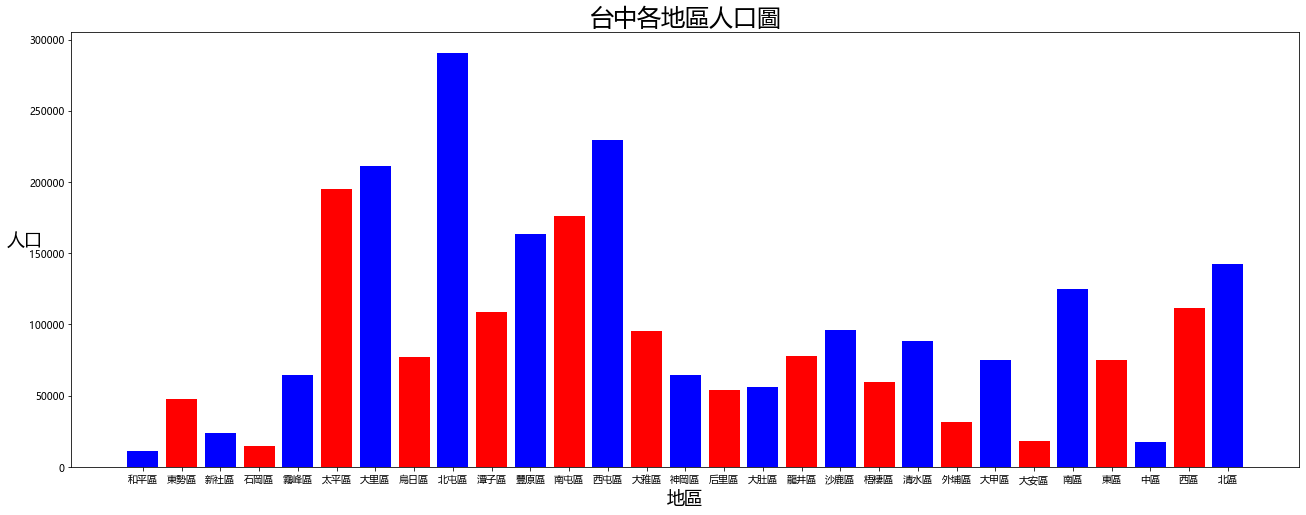

In [47]:
#對資料做視覺化圖表
plt.figure(figsize=(22,8))
#使顏色紅藍相間
fig = plt.bar(data['District'], data['Population'],color=[ 'blue', 'red'])
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.title('台中各地區人口圖', fontsize = 24)
plt.xlabel('地區', fontsize = 18)
plt.ylabel('人口', fontsize = 18,rotation=0)
#plt.xticks(x, rotation=90)#翻轉各地區文字角度
#plt.savefig('台中各地區人口圖.png')